3806.2727 9193.905
1249.0734 3017.0886
3809.7805 9206.613
1189.9407 2875.5786


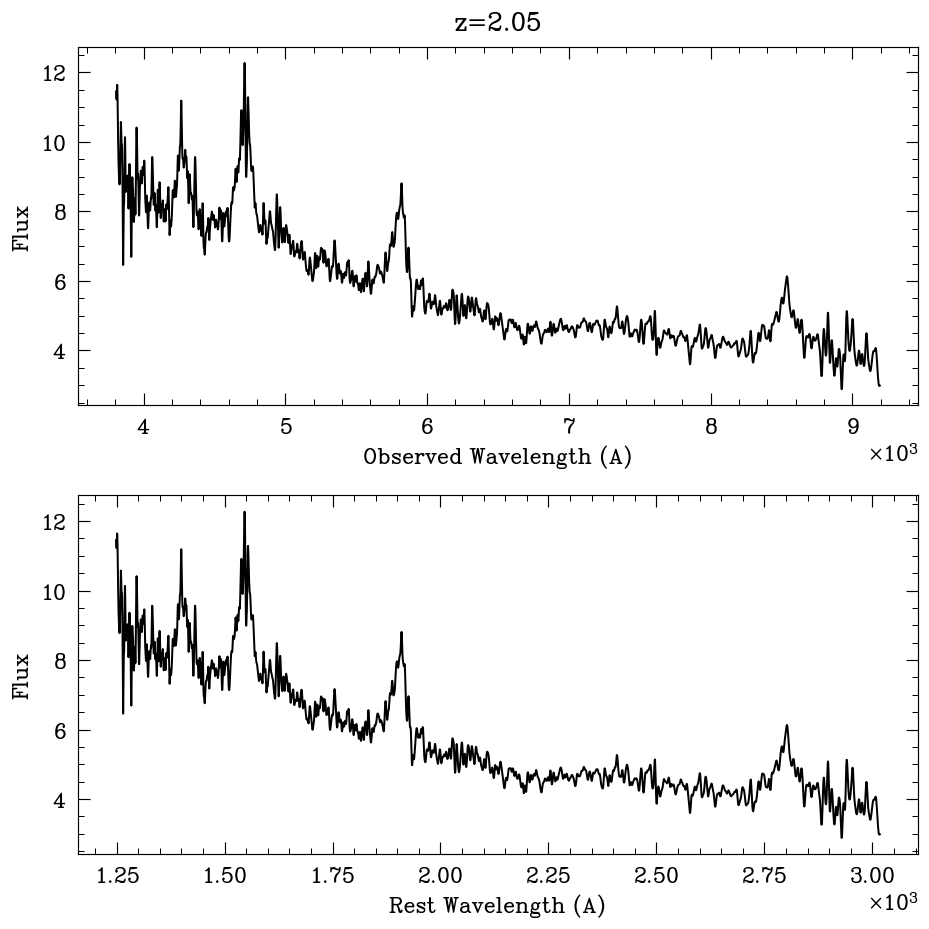

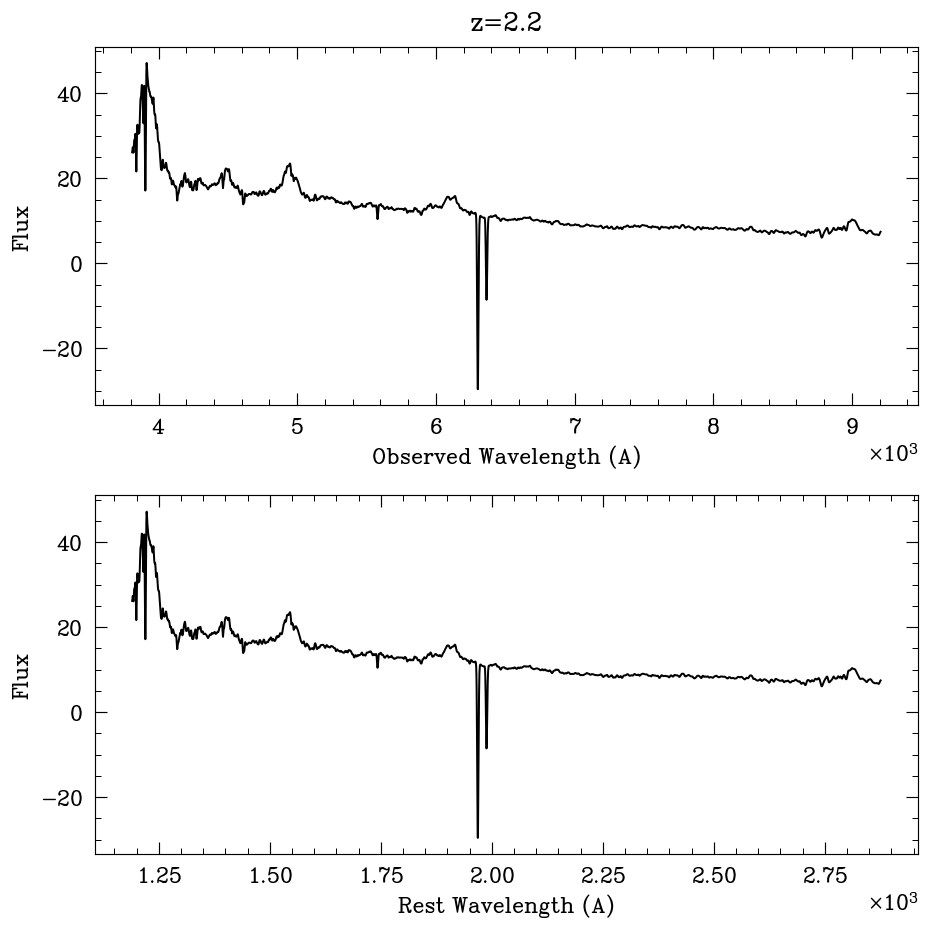

In [31]:
from astropy.io import fits 
import matplotlib.pyplot as plt 
import smplotlib 
import numpy as np 
from scipy.ndimage import gaussian_filter1d

data_paths = ['/Users/tkiker/Documents/GitHub/AGN-UMAP/data/0291/spec-0291-51928-0229.fits',
              '/Users/tkiker/Documents/GitHub/AGN-UMAP/data/0362/spec-0362-51999-0560.fits']

for data_path in data_paths: 

    hdul = fits.open(data_path)

    wavelength = 10** hdul[1].data['loglam']
    flux = hdul[1].data['flux']

    flux = gaussian_filter1d(flux, sigma=3)

    z = hdul[2].data['z'][0]

    rest_wavelength = wavelength/(1+z)

    fig, axs = plt.subplots(2, 1, figsize=(8,8))

    axs[0].plot(wavelength, flux)
    axs[0].set(ylabel='Flux', xlabel='Observed Wavelength (A)', title=f'z={str(round(z, 2))}')

    axs[1].plot(rest_wavelength, flux)
    axs[1].set(ylabel='Flux', xlabel='Rest Wavelength (A)')
    print(min(wavelength), max(wavelength))
    print(min(rest_wavelength), max(rest_wavelength))

    fig.tight_layout()

<Axes: ylabel='Density'>

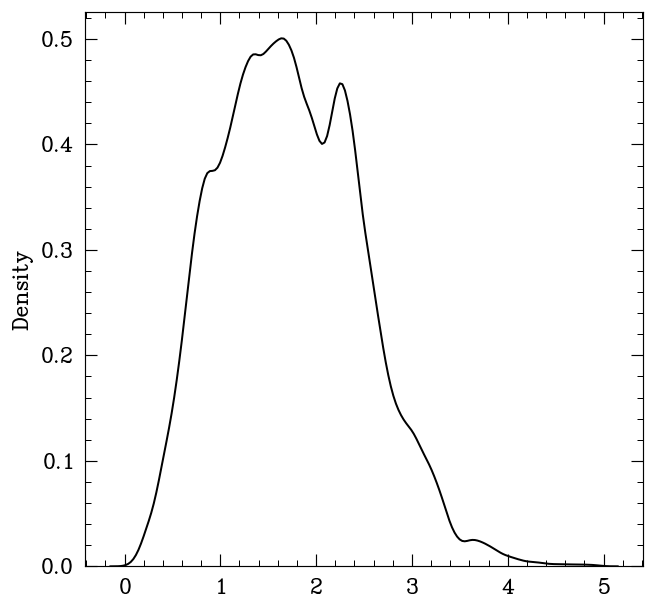

In [60]:
import os 
from tqdm import tqdm 
import seaborn as sns

quasar_catalog = '/Users/tkiker/Documents/GitHub/AGN-UMAP/DR16Q_v4.fits'
quasar_catalog = fits.open(quasar_catalog)[1].data

z = quasar_catalog['Z'].astype(dtype='<f8')
z = z[np.logical_and(z>=0, z<=5)]

sns.kdeplot(z)

In [ ]:
#ZWARNING ???

In [68]:
import pandas as pd 

quasar_catalog = '/Users/tkiker/Documents/GitHub/AGN-UMAP/DR16Q_v4.fits'
quasar_catalog = fits.open(quasar_catalog)[1].data

z = quasar_catalog['Z'].astype(dtype='<f8')
z_mask = np.logical_and(z>=1.5, z<=2.2)

z = z[z_mask]
plates = quasar_catalog['PLATE'][z_mask]
mjds = quasar_catalog['MJD'][z_mask]
fiber_IDs = quasar_catalog['FIBERID'][z_mask]

key_df = pd.DataFrame()

key_df['z'] = z
key_df['PLATE'] = plates
key_df['MJD'] = mjds
key_df['FIBERID'] = fiber_IDs

key_df.to_csv('/Users/tkiker/Documents/GitHub/AGN-UMAP/code/monthly/aug2024/wk1/quasar_key.csv', index=False)

In [80]:
# check data range for rest frame spectrum. 
import numpy as np 
wave_obs = 10 ** np.arange(3.549, 4.0175, 0.0001)
print(len(wave_obs), min(wave_obs), max(wave_obs), (max(wave_obs)-min(wave_obs))/len(wave_obs))

4686 3539.9734108343464 10411.181076257095 1.4663268598853496


In [78]:
bounds = np.array([3539, 10411])
print(bounds/(1+1.5))
print(bounds/(1+2.2))

[1415.6 4164.4]
[1105.9375 3253.4375]


In [81]:
(4164-1106)*(2*0.68)

4158.88

In [83]:
observed_resolution = (10411-3539)/4686
rest_frame_length = 2*(4164-1106)/observed_resolution

rest_frame_length

4170.485448195576

In [84]:
rest_frame_range = 4164-1106
rest_frame_range

3058

In [82]:
file_path = '/Users/tkiker/Documents/GitHub/AGN-UMAP/data/sdss_spectra/spec-4217-55478-0711.fits'

hdul = fits.open(file_path)

wavelength = 10**hdul[1].data['loglam']
print(len(wavelength), min(wavelength), max(wavelength), (max(wavelength)-min(wavelength))/len(wavelength))

4621 3586.74 10392.016 1.4726845684105172
